In [113]:
# Import libraries
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os
import glob

option_list = ['kaggle', 'chest', 'mnist-relu', 'mnist-sigmoid', 'cifar-10-relu', 'cifar-10-sigmoid', 'cifar-10-top3-relu', 'cifar-10-top3-sigmoid'] 
# color_codes = ['b','g','r','c','m','y','coral','darkgoldenrod', 'olive','teal','navy','magenta','peru','pink']
color_codes = ['grey', 'grey', 'grey']
steps=[3.125, 6.25, 1.5625, 1.5625, 1.5625, 1.5625, 1.5625, 1.5625]
baselinefile = ""
filenames = []


In [114]:

option = 0
# 0: "kaggle"
# 1: "xray"
# 2: "mnist-relu"
# 3: "mnist-sigmoid"
# 4: "cifar-relu"
# 5: "cifar-sigmoid"
# 6: "cifar-top3-relu"
# 7: "cifar-top3-sigmoid"

# For chest, mnist and cifar models, we have 2 alpha values, so you can switch between 0 and 1

if option == 0:
    # filenames = ["logs/kaggle-1000_tape_baseline.csv", "logs/kaggle-100_tape_stochastic_0.75.csv"]
    baselinefile = "logs/baseline/kaggle-1000_tape_baseline.csv" 
    for file in glob.glob('logs/kaggle*.csv'):
        filenames.append(file)
elif option == 1:
    #filenames = ["logs/chest-1000_tape_baseline.csv", "logs/chest-1000_tape_stochastic_0.75.csv"]
    baselinefile = "logs/baseline/chest-1000_tape_baseline.csv" 
    for file in glob.glob('logs/chest*.csv'):
        filenames.append(file)
elif option == 2: 
    #filenames = ["logs/mnist-1000-relu_tape_baseline.csv", "logs/mnist-1000-relu_tape_stochastic_0.75.csv"]
    baselinefile = "logs/baseline/mnist-relu-1000_tape_baseline.csv" 
    for file in glob.glob('logs/mnist-relu*.csv'):
        filenames.append(file)
elif option == 3:
    #filenames = ["logs/mnist-1000-sigmoid_tape_baseline.csv", "logs/mnist-1000-sigmoid_tape_stochastic_0.05.csv"]
    baselinefile = "logs/baseline/mnist-sigmoid-1000_tape_baseline.csv" 
    for file in glob.glob('logs/mnist-sigmoid*.csv'):
        filenames.append(file)
elif option == 4:
    #filenames = ["logs/cifar-1000-relu_tape_baseline.csv", "logs/cifar-1000-relu_tape_stochastic_0.75.csv"]
    baselinefile = "logs/baseline/cifar-10-relu-1000_tape_baseline.csv" 
    for file in glob.glob('logs/cifar-10-relu*.csv'):
        filenames.append(file)
elif option == 5:
    #filenames = ["logs/cifar-1000-sigmoid_tape_baseline.csv", "logs/cifar-1000-sigmoid_tape_stochastic_0.05.csv"]
    baselinefile = "logs/baseline/cifar-10-sigmoid-1000_tape_baseline.csv" 
    for file in glob.glob('logs/cifar-10-sigmoid*.csv'):
        filenames.append(file)
elif option == 6:
    #filenames = ["logs/cifar-1000-relu_tape_baseline.csv", "logs/cifar-1000-relu_tape_stochastic_0.75.csv"]
    baselinefile = "logs/baseline/cifar-10-top3-relu-1000_tape_baseline.csv" 
    for file in glob.glob('logs/cifar-10-top3-relu*.csv'):
        filenames.append(file)
else:
    #filenames = ["logs/cifar-1000-sigmoid_tape_baseline.csv", "logs/cifar-1000-sigmoid_tape_stochastic_0.05.csv"]
    baselinefile = "logs/baseline/cifar-10-top3-sigmoid-1000_tape_baseline.csv" 
    for file in glob.glob('logs/cifar-10-top3-sigmoid*.csv'):
        filenames.append(file)

robustness_baseline_lst = []
robustness_baseline_lst_2 = []
robustness_ours_lst = []
robustness_ours_lst_2 = []

accuracy_baseline_lst = []
accuracy_ours_lst = []

num_epoch_baseline = 0
num_epoch_lst = []


figure_filename = "save_figs/draft-"+option_list[option]+".png"


In [115]:
# Read from baseline log
robustness_at_zero = 0
robustness_at_zero_2 = 0
accuracy_at_zero = 0

robustness = []
robustness_2 = []
accuracy = []
num_epoch = 0
with open(baselinefile, newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',', quotechar='"')
    # This skips the first 2 rows of the CSV file (the first pruning starts at row 3).
    next(csvreader)
    stat_at_zero = next(csvreader)
    
    robustness_at_zero = int(stat_at_zero[0])
    if option > 1:
        robustness_at_zero_2 = int(stat_at_zero[1])
    accuracy_at_zero = float(stat_at_zero[-1][1:-1].split(',')[-1])

    for row in csvreader:
        num_epoch += 1
        # The first item in each row is number of robustness instances
        # The last item in each row is the [loss, accuracy]
        robustness_baseline_lst.append(int(row[0]))
        if option > 1:
            robustness_baseline_lst_2.append(int(row[1]))
        accuracy_baseline_lst.append(float(row[-1][1:-1].split(',')[-1]))
        # print(robustness[-1],accuracy[-1])
    num_epoch_baseline = num_epoch


In [116]:
# Read from log files generated by our algorithm
for logfile in filenames:
    print("Reading from log file:", logfile)
    robustness = []
    robustness_2 = []
    accuracy = []
    num_epoch = 0
    with open(logfile, newline='') as csvfile:
        csvreader = csv.reader(csvfile, delimiter=',', quotechar='"')
        
        # This skips the first row of the CSV file.
        next(csvreader)

        for row in csvreader:
            num_epoch += 1
            # The first item in each row is number of robustness instances
            # The last item in each row is the [loss, accuracy]
            robustness.append(int(row[0]))
            if option > 1:
                robustness_2.append(int(row[1]))
            accuracy.append(float(row[-1][1:-1].split(',')[-1]))
            # print(robustness[-1],accuracy[-1])
            
    robustness_ours_lst.append(robustness)
    robustness_ours_lst_2.append(robustness_2)
    accuracy_ours_lst.append(accuracy)
    num_epoch_lst.append(num_epoch)


Reading from log file: logs/kaggle-Aug-28-0225-1000_tape_stochastic_0.75.csv
Reading from log file: logs/kaggle-Aug-28-0043-1000_tape_stochastic_0.75.csv
Reading from log file: logs/kaggle-Aug-28-0316-1000_tape_stochastic_0.75.csv
Reading from log file: logs/kaggle-Sep-01-1809-1000_tape_stochastic_0.75.csv
Reading from log file: logs/kaggle-Aug-28-0406-1000_tape_stochastic_0.75.csv
Reading from log file: logs/kaggle-Sep-01-1522-1000_tape_stochastic_0.75.csv
Reading from log file: logs/kaggle-Aug-28-0135-1000_tape_stochastic_0.75.csv
Reading from log file: logs/kaggle-Sep-01-1523-1000_tape_stochastic_0.75.csv
Reading from log file: logs/kaggle-Aug-27-1848-1000_tape_stochastic_0.75.csv
Reading from log file: logs/kaggle-Sep-01-1803-1000_tape_stochastic_0.75.csv
Reading from log file: logs/kaggle-Aug-27-2355-1000_tape_stochastic_0.75.csv
Reading from log file: logs/kaggle-Aug-27-2306-1000_tape_stochastic_0.75.csv


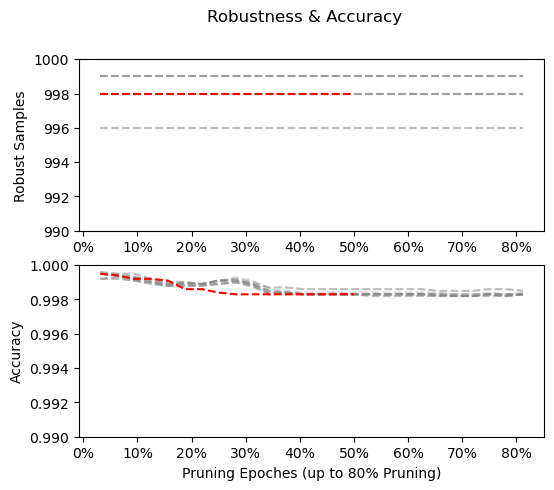

In [117]:
if option <= 1:
  plt.rcParams['figure.figsize'] = [6, 5]
  plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
  fig, (ax1, ax2) = plt.subplots(2, 1)
else:
  plt.rcParams['figure.figsize'] = [6, 8]
  plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
  fig, (ax1, ax1_a, ax2) = plt.subplots(3, 1)
fig.suptitle('Robustness & Accuracy')

epoch_baseline = np.arange(1., num_epoch_baseline+1, 1) * steps[option]
epoch_ours = np.arange(1., num_epoch_lst[0]+1, 1) * steps[option]

# Plot our results
for index, robustness_lst in enumerate(robustness_ours_lst):
  log_timestamp = filenames[index].split('-')[2:-1] # E.g. take "Aug-27-2000" out from the log filename
  line_color = color_codes[index % len(color_codes)]
  if robustness_lst[0] != -1: # -1 means the data of given epsilon is not available in that log file
    ax1.plot(epoch_ours, robustness_lst , '--', color=line_color, alpha=0.3, label=("-").join(log_timestamp))
  if option > 1:
    if robustness_ours_lst_2[index][0] != -1: # -1 means the data of given epsilon is not available in that log file
      ax1_a.plot(epoch_ours, robustness_ours_lst_2[index] , '--', color=line_color, alpha=0.3, label=("-").join(log_timestamp))

# Plot the baseline
ax1.plot(epoch_baseline, robustness_baseline_lst, '--', color='red', label="baseline")
if option > 1:
  ax1_a.plot(epoch_baseline, robustness_baseline_lst_2, '--', color='red', label="baseline")


ax1.set_ylabel('Robust Samples')
if option > 1:
  ax1_a.set_ylabel('Robust Samples')
# ax1.set_xticklabels(xticks)

# Plot our results
for index, accuracy_lst in enumerate(accuracy_ours_lst):
  log_timestamp = filenames[index].split('-')[2:-1] # E.g. take "Aug-27-2000" out from the log filename
  line_color = color_codes[index % len(color_codes)]
  ax2.plot(epoch_ours, accuracy_lst, '--', color=line_color, alpha=0.3, label=("-").join(log_timestamp)) 

# Plot the baseline
ax2.plot(epoch_baseline, accuracy_baseline_lst, '--', color='red', label="baseline")

ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Pruning Epoches (up to 80% Pruning)')

ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax2.xaxis.set_major_formatter(mtick.PercentFormatter())

#ax1.legend(prop={'size': 6})
#ax2.legend(prop={'size': 6})

if option > 1:
  #ax1_a.legend(prop={'size': 6})
  ax1_a.xaxis.set_major_formatter(mtick.PercentFormatter())

# More customization for specific options
if option == 0:
  ax1.set_ylim(990, 1000)
  ax2.set_ylim(0.99, 1)
if os.path.exists(figure_filename):
  os.remove(figure_filename)

plt.savefig(figure_filename)


In [118]:
from statistics import mean, median
import math

# Transpose the robustness list
robustness_ours_lst_transpose = list(zip(*robustness_ours_lst))

lowest_rob_list = []
highest_rob_list = []
median_rob_list = []

for epoch_index, epoch_record in enumerate(robustness_ours_lst_transpose):
    lowest_rob_list.append(min(epoch_record))
    highest_rob_list.append(max(epoch_record))
    median_rob_list.append(math.ceil(median(epoch_record)))  

# Transpose the 2nd robustness list (if any)
robustness_ours_lst_transpose_2 = list(zip(*robustness_ours_lst_2))

lowest_rob_list_2 = []
highest_rob_list_2 = []
median_rob_list_2 = []

for epoch_index, epoch_record in enumerate(robustness_ours_lst_transpose_2):
    lowest_rob_list_2.append(min(epoch_record))
    highest_rob_list_2.append(max(epoch_record))
    median_rob_list_2.append(math.ceil(median(epoch_record)))  

# Transpose the robustness list
accuracy_ours_lst_transpose = list(zip(*accuracy_ours_lst))

lowest_acc_list = []
highest_acc_list = []
median_acc_list = []

for epoch_index, epoch_record in enumerate(accuracy_ours_lst_transpose):
    lowest_acc_list.append(min(epoch_record))
    highest_acc_list.append(max(epoch_record))
    median_acc_list.append(median(epoch_record))


In [119]:

if option > 1:
    rob_stat_filename = "logs/stat/" + option_list[option] + "-robustness-e1.csv"
    rob_stat_filename_2 = "logs/stat/" + option_list[option] + "-robustness-e2.csv"
else:
    rob_stat_filename = "logs/stat/" + option_list[option] + "-robustness.csv"
    rob_stat_filename_2 = ""

if os.path.exists(rob_stat_filename):
    os.remove(rob_stat_filename)


with open(rob_stat_filename, 'w+', newline='') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')

    csv_line = ['progress','lo','hi','median']
    csv_writer.writerow(csv_line)

    # Write the initial state
    csv_writer.writerow([str(0), str(robustness_at_zero), str(robustness_at_zero), str(robustness_at_zero)])

    for index in range(0, len(robustness_ours_lst_transpose)):
        rob_stat_row = [str(steps[option] * (index + 1)), \
            str(lowest_rob_list[index]), \
            str(highest_rob_list[index]), \
            str(median_rob_list[index])]

        csv_writer.writerow(rob_stat_row)

if rob_stat_filename_2 != "":
    if os.path.exists(rob_stat_filename_2):
        os.remove(rob_stat_filename_2)

    with open(rob_stat_filename_2, 'w+', newline='') as csv_file:
        csv_writer = csv.writer(csv_file, delimiter=',')

        csv_line = ['progress','lo','hi','median']
        csv_writer.writerow(csv_line)

        # Write the initial state
        csv_writer.writerow([str(0), str(robustness_at_zero_2), str(robustness_at_zero_2), str(robustness_at_zero_2)])

        for index in range(0, len(robustness_ours_lst_transpose_2)):
            rob_stat_row = [str(steps[option] * (index + 1)), \
                str(lowest_rob_list_2[index]), \
                str(highest_rob_list_2[index]), \
                str(median_rob_list_2[index])]

            csv_writer.writerow(rob_stat_row)

acc_stat_filename = "logs/stat/" + option_list[option] + "-accuracy.csv"

if os.path.exists(acc_stat_filename):
    os.remove(acc_stat_filename)

with open(acc_stat_filename, 'w+', newline='') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')

    csv_line = ['progress','lo','hi','median']
    csv_writer.writerow(csv_line)

    # Write the initial state
    csv_writer.writerow([str(0), str(accuracy_at_zero), str(accuracy_at_zero), str(accuracy_at_zero)])

    for index in range(0, len(accuracy_ours_lst_transpose)):
        acc_stat_row = [str(steps[option] * (index + 1)), \
            str(lowest_acc_list[index]), \
            str(highest_acc_list[index]), \
            str(median_acc_list[index])]

        csv_writer.writerow(acc_stat_row)


